# YOLOv8


In [1]:
import os
import torch
torch.cuda.is_available()

True

In [2]:
import sys
import os
import cv2
sys.path.insert(0, os.path.dirname(os.getcwd()))

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
import ultralytics
from ultralytics import YOLO
ultralytics.utils.torch_utils.select_device(device=0, batch=0, newline=False, verbose=True)

model = YOLO('./ckpt/layout-analysis/yolov8n_best.pt').to('cuda')
# model2 = YOLO('8mpt/best.pt').to('cuda')

Ultralytics YOLOv8.1.3 🚀 Python-3.11.6 torch-2.1.2+cu121 CUDA:0 (NVIDIA RTX 2000 Ada Generation Laptop GPU, 7943MiB)


In [9]:
name = 'index.png'
np_image = cv2.imread(name, cv2.IMREAD_GRAYSCALE)
prefix = name.split('.')[0]
results = model(name)


image 1/1 /home/mao/workspace/24histories/index.png: 640x480 1 Header, 4 Texts, 1 Reference, 1 Figure caption, 2 Figures, 10.2ms
Speed: 14.4ms preprocess, 10.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)


In [15]:
results[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Header', 1: 'Text', 2: 'Reference', 3: 'Figure caption', 4: 'Figure', 5: 'Table caption', 6: 'Table', 7: 'Title', 8: 'Footer', 9: 'Equation'}
obb: None
orig_img: array([[[250, 250, 250],
        [250, 250, 250],
        [249, 249, 249],
        ...,
        [248, 248, 248],
        [249, 249, 249],
        [250, 250, 250]],

       [[250, 250, 250],
        [249, 249, 249],
        [248, 248, 248],
        ...,
        [247, 247, 247],
        [248, 248, 248],
        [249, 249, 249]],

       [[249, 249, 249],
        [248, 248, 248],
        [247, 247, 247],
        ...,
        [246, 246, 246],
        [247, 247, 247],
        [248, 248, 248]],

       ...,

       [[245, 245, 245],
        [241, 241, 241],
        [236, 236, 236],
        ...,
        [229, 229, 229],
        [236, 236, 236],
        [241, 241, 241]],

       [[245, 245,

In [14]:
from pprint import pprint
pprint(results[0].tojson())

('[\n'
 '  {\n'
 '    "name": "Text",\n'
 '    "class": 1,\n'
 '    "confidence": 0.976769745349884,\n'
 '    "box": {\n'
 '      "x1": 680.3551635742188,\n'
 '      "y1": 709.6982421875,\n'
 '      "x2": 1291.508544921875,\n'
 '      "y2": 1814.4749755859375\n'
 '    }\n'
 '  },\n'
 '  {\n'
 '    "name": "Text",\n'
 '    "class": 1,\n'
 '    "confidence": 0.9460489153862,\n'
 '    "box": {\n'
 '      "x1": 159.34324645996094,\n'
 '      "y1": 1123.94580078125,\n'
 '      "x2": 621.8890380859375,\n'
 '      "y2": 1315.979248046875\n'
 '    }\n'
 '  },\n'
 '  {\n'
 '    "name": "Title",\n'
 '    "class": 7,\n'
 '    "confidence": 0.9253549575805664,\n'
 '    "box": {\n'
 '      "x1": 601.0286865234375,\n'
 '      "y1": 451.9971008300781,\n'
 '      "x2": 847.106201171875,\n'
 '      "y2": 493.45458984375\n'
 '    }\n'
 '  },\n'
 '  {\n'
 '    "name": "Title",\n'
 '    "class": 7,\n'
 '    "confidence": 0.9064579010009766,\n'
 '    "box": {\n'
 '      "x1": 163.46348571777344,\n'
 '     

In [5]:
orig_img = results[0].orig_img

In [33]:
x1,y1,x2,y2 = results[0].boxes.xyxy[0]

In [34]:
orig_img.shape

(1952, 1459, 3)

In [1]:
results[0].label

NameError: name 'results' is not defined

In [35]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 1., 1., 7., 7., 1., 7., 1., 1., 0., 7., 1.], device='cuda:0')
conf: tensor([0.9860, 0.9625, 0.9320, 0.8994, 0.8708, 0.8479, 0.7852, 0.7560, 0.6393, 0.4053, 0.2755, 0.2673], device='cuda:0')
data: tensor([[6.8027e+02, 7.0922e+02, 1.2924e+03, 1.8131e+03, 9.8596e-01, 1.0000e+00],
        [1.5853e+02, 1.1240e+03, 6.2204e+02, 1.3158e+03, 9.6248e-01, 1.0000e+00],
        [1.6036e+02, 8.7512e+02, 6.2154e+02, 1.0268e+03, 9.3199e-01, 1.0000e+00],
        [6.4072e+02, 5.5738e+02, 8.1033e+02, 5.9294e+02, 8.9939e-01, 7.0000e+00],
        [6.0239e+02, 4.5251e+02, 8.4795e+02, 4.9416e+02, 8.7082e-01, 7.0000e+00],
        [1.6183e+02, 6.7415e+02, 6.2238e+02, 8.1942e+02, 8.4786e-01, 1.0000e+00],
        [1.6393e+02, 3.0577e+02, 3.8558e+02, 3.5450e+02, 7.8524e-01, 7.0000e+00],
        [1.6018e+02, 1.4144e+03, 6.2074e+02, 1.6464e+03, 7.5604e-01, 1.0000e+00],
        [1.5896e+02, 1.7024e+03, 6.1851e+02, 1.8130e+03, 6.3928e-01, 1.00

In [38]:
from math import ceil, floor


cropped = orig_img[floor(y1)-10:ceil(y2)+10, floor(x1)-10:ceil(x2)+10]

In [7]:
import matplotlib.pyplot as plt

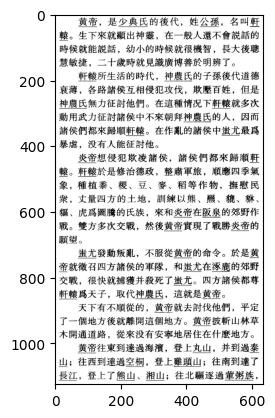

In [39]:
plt.imshow(cropped)

In [41]:
cv2.imwrite(f'cropped.png',cropped)

True

In [6]:
cv2.imwrite(f'm_result_{prefix}.png', results[0].plot())

True

# CnOCR


In [42]:
from cnocr import CnOcr
ocr = CnOcr(rec_model_name='chinese_cht_PP-OCRv3')
out = ocr.ocr(cropped)

[WARNING 2024-01-20 18:06:50,141 _assert_and_prepare_model_files:105] can not find model file /home/mao/.cnocr/2.3/ppocr/chinese_cht_PP-OCRv3_rec_infer.onnx 
100%|██████████| 9533/9533 [00:34<00:00, 278.16KB/s]
2024-01-20 18:07:25.325075342 [E:onnxruntime:Default, provider_bridge_ort.cc:1480 TryGetProviderInfo_CUDA] /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1193 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_cuda.so with error: libcublasLt.so.11: 无法打开共享对象文件: 没有那个文件或目录

2024-01-20 18:07:25.325091190 [W:onnxruntime:Default, onnxruntime_pybind_state.cc:747 CreateExecutionProviderInstance] Failed to create CUDAExecutionProvider. Please reference https://onnxruntime.ai/docs/execution-providers/CUDA-ExecutionProvider.html#requirements to ensure all dependencies are met.
[WARNING 2024-01-20 18:07:25,389 _assert_and_prepare_model_files:124] can not find model file /home/mao/.cnstd

EP Error /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1193 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_tensorrt.so with error: libcublas.so.11: 无法打开共享对象文件: 没有那个文件或目录
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'AzureExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.


In [43]:
out

[{'text': '黃帝湧是少典民的後代毬姓公孫毬名的軒',
  'score': 0.749297,
  'position': array([[         73,          15],
         [        619,          15],
         [        619,          35],
         [         73,          35]], dtype=float32)},
 {'text': '轅躂生下來就顆出神蟲昇在一般人還不會說話的',
  'score': 0.8142029,
  'position': array([[         16,          54],
         [        616,          54],
         [        616,          75],
         [         16,          75]], dtype=float32)},
 {'text': '時候就龍說話湧幼小的時候就根機智湧長大後聰',
  'score': 0.77133894,
  'position': array([[         16,          97],
         [        619,          97],
         [        619,         117],
         [         16,         117]], dtype=float32)},
 {'text': '慧敏捷湧二十歲時就見識廣博善旋明辯了',
  'score': 0.87229115,
  'position': array([[         13,         135],
         [        550,         136],
         [        550,         161],
         [         13,         160]], dtype=float32)},
 {'text': '軒轅所生活的時代子神農氏的子孫後代道德',
  'score': 0.92385244,
  'positi

# Layoutparser


In [1]:
import layoutparser as lp
import cv2

In [6]:
image = cv2.imread("img.png")
image = image[..., ::-1]

In [7]:
import layoutparser as lp
from layoutparser.models.detectron2 import catalog
import copy
import os
import requests as requests


def load_model(
        config_path: str = 'lp://<dataset_name>/<model_name>/config',
):

    config_path_split = config_path.split('/')
    dataset_name = config_path_split[-3]
    model_name = config_path_split[-2]

    # get the URLs from the MODEL_CATALOG and the CONFIG_CATALOG 
    # (global variables .../layoutparser/models/detectron2/catalog.py)
    model_url = catalog.MODEL_CATALOG[dataset_name][model_name]
    config_url = catalog.CONFIG_CATALOG[dataset_name][model_name]

    # override folder destination:
    if 'model' not in os.listdir():
        os.mkdir('model')

    config_file_path, model_file_path = None, None

    for url in [model_url, config_url]:
        filename = url.split('/')[-1].split('?')[0]
        save_to_path = f"model/" + filename
        if 'config' in filename:
            config_file_path = copy.deepcopy(save_to_path)
        if 'model_final' in filename:
            model_file_path = copy.deepcopy(save_to_path)

        # skip if file exist in path
        if filename in os.listdir("model"):
            continue
        # Download file from URL
        r = requests.get(url, stream=True, headers={'user-agent': 'Wget/1.16 (linux-gnu)'})

        with open(save_to_path, "wb") as f:
            for chunk in r.iter_content(chunk_size=4096):
                if chunk:
                    f.write(chunk)

    # load the label map
    label_map = catalog.LABEL_MAP_CATALOG[dataset_name]

    return lp.models.Detectron2LayoutModel(
        config_path=config_file_path,
        model_path=model_file_path,
        label_map=label_map
    )

model = load_model('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config')

/home/mao/micromamba/envs/ocr/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


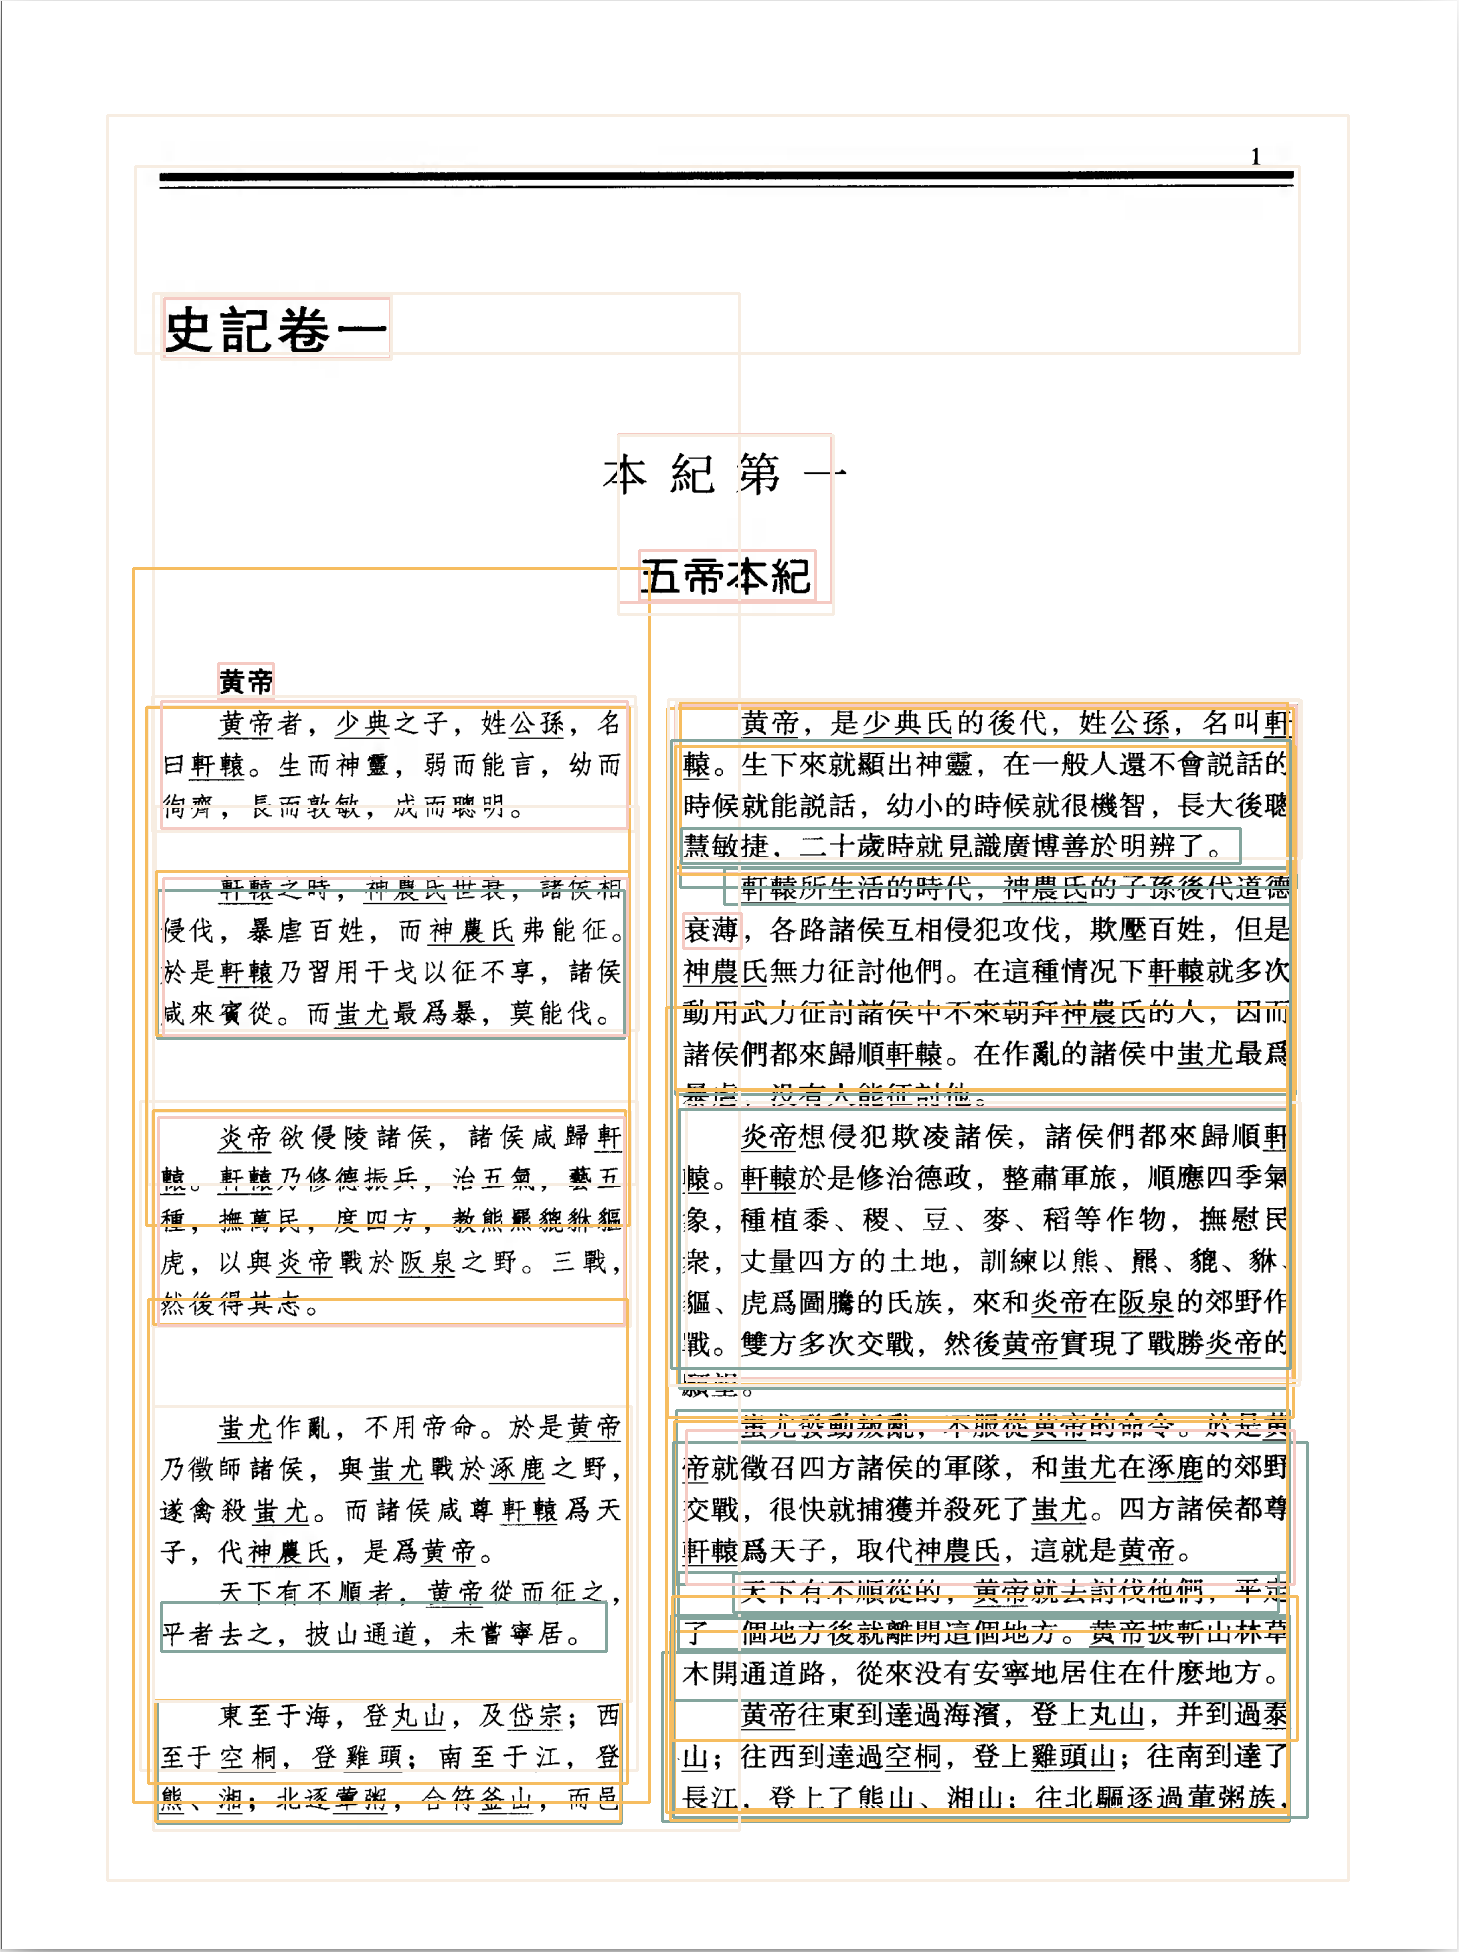

In [8]:
layout = model.detect(image)
    # Detect the layout of the input image
lp.draw_box(image, layout, box_width=3)
    # Show the detected layout of the input image

# Paddle
